Q1

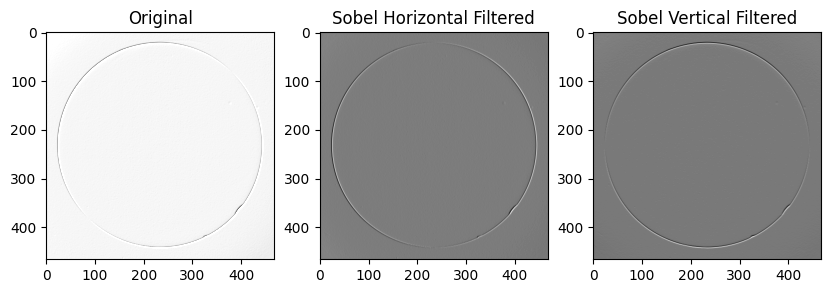

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


im= cv.imread(r"D:\Saves\Python\ImgProAssignment2\images\contact_lens.tif", cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None


sobel_h= np.array([[-1,0,1],[-2,0,2],[-1,0,1]], np.float32)
fx = cv.filter2D(im.astype('float'), -1, sobel_h)
fx = cv.normalize(fx.astype('float'), None,0, 255.0, cv.NORM_MINMAX)

sobel_v= np.array([[-1,-2,-1],[0,0,0],[1,2,1]], np.float32)
fy = cv.filter2D(im.astype('float'), -1, sobel_v)
fy = cv.normalize(fy.astype('float'), None,0, 255.0, cv.NORM_MINMAX)

magnitude= np.abs(fx) + np.abs(fy)

fig, ax= plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(magnitude, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[1].imshow(fx, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Sobel Horizontal Filtered')
ax[2].imshow(fy, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Sobel Vertical Filtered')
plt.show()

Q2

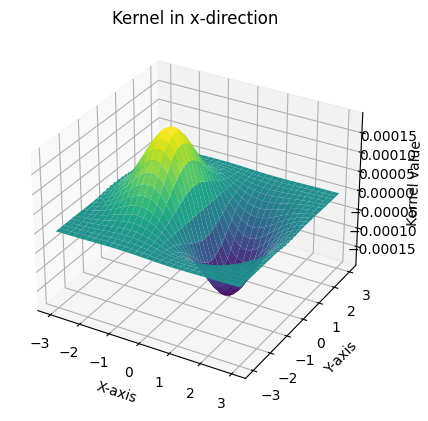

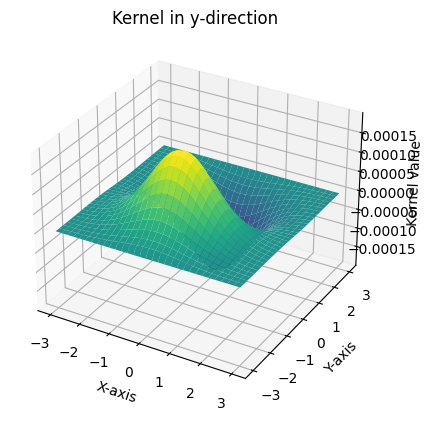

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import cv2 as cv

# define the domain
x = np.arange(-3, 3.1, 0.1)
y = np.arange(-3, 3.1, 0.1)
X, Y = np.meshgrid(x, y)

# define sigma
sigma = 1
# calculate the kernels
G= np.exp(-(X**2+Y**2)/(2*sigma**2))

kernelx= np.array([[0,0,0],[-1,0.,1],[0,0,0]], dtype=np.float32)
Gx= cv.filter2D(G, -1, kernelx)

kernely= np.array([[0,-1,0],[0,0,0],[0,1,0]], dtype=np.float32)
Gy= cv.filter2D(G, -1, kernely)

# plot the kernels
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Gx, cmap='viridis')
ax.set_title('Kernel in x-direction')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Kernel value')
plt.show()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Gy, cmap='viridis')
ax.set_title('Kernel in y-direction')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Kernel value')
plt.show()

Q3

"\nax[2].imshow(im22, cmap='gray', vmin=0, vmax=255)\nax[2].set_title('High Frequencies')\nax[3].imshow(im3, cmap='gray', vmin=0, vmax=255)\nax[3].set_title('Sharpened')\n\n"

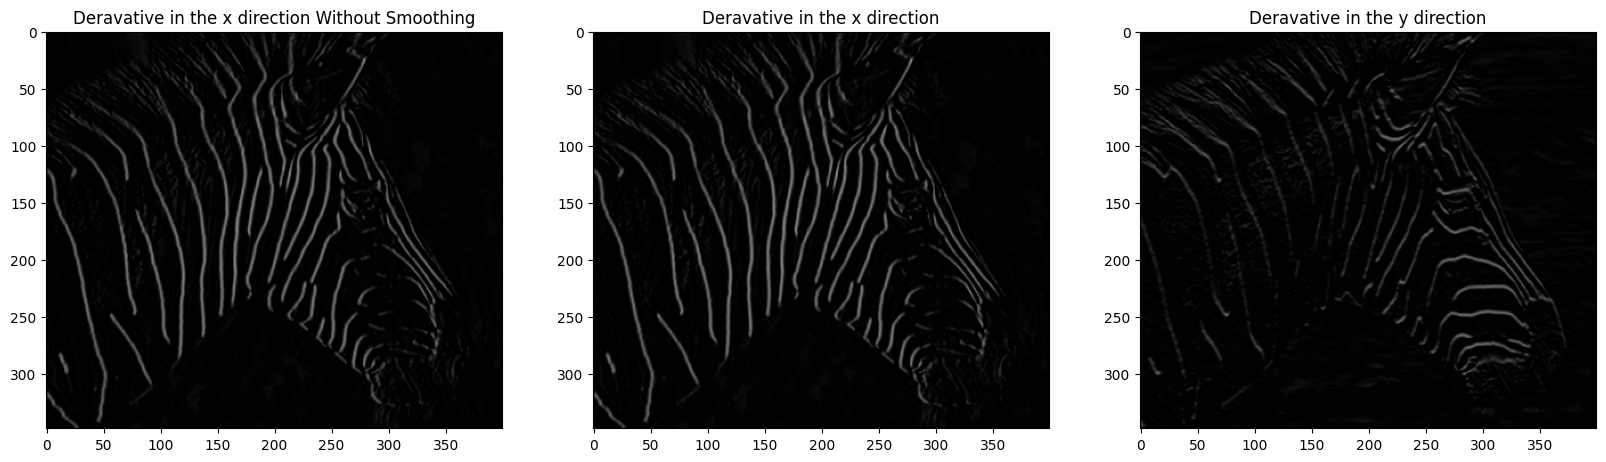

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# define the domain
x = np.arange(-5, 6, 1)
y = np.arange(-5, 6, 1)
X, Y = np.meshgrid(x, y)


# calculate the kernels
sigma = 1
G= np.exp(-(X**2+Y**2)/(2*sigma**2))
G=G/np.sum(G)

kernelx= np.array([[0,0,0],[-1,0.,1],[0,0,0]], dtype=np.float32)
Gx= cv.filter2D(G, -1, kernelx)

kernely= np.array([[0,-1,0],[0,0,0],[0,1,0]], dtype=np.float32)
Gy= cv.filter2D(G, -1, kernely)


im= cv.imread(r"D:\Saves\Python\ImgProAssignment2\images\zebrahead.jpg", cv.IMREAD_GRAYSCALE)  

im1=cv.filter2D(im, -1, G)


im_x=cv.filter2D(im, -1, Gx)
im_y=cv.filter2D(im, -1, Gy)
im_n=cv.filter2D(im, -1, kernelx)


fig, ax= plt.subplots(1,3, figsize=(20,10))
ax[0].imshow(im_x, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Deravative in the x direction Without Smoothing')
ax[1].imshow(im_x, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Deravative in the x direction')
ax[2].imshow(im_y, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Deravative in the y direction')

'''
ax[2].imshow(im22, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('High Frequencies')
ax[3].imshow(im3, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Sharpened')

'''
#plt.show()

#plt.imshow(im_x, cmap='gray', vmin=0, vmax=255)





Q4

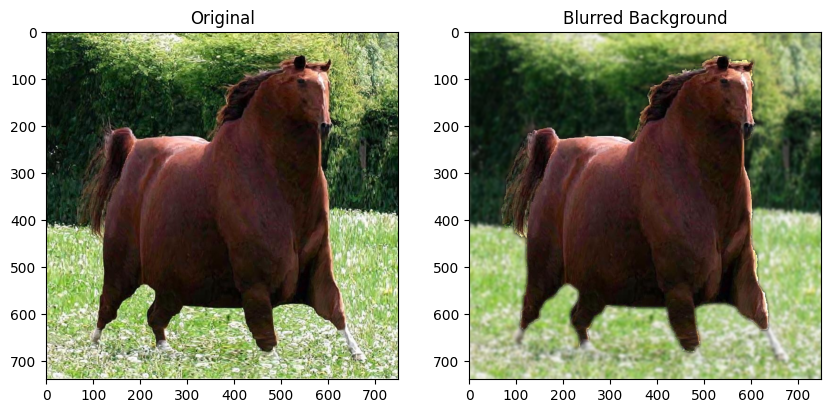

(739, 750, 3)


In [41]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

im= cv.imread(r"D:\Saves\Python\ImgProAssignment2\images\horse.jpg", cv.IMREAD_COLOR)
im=cv.cvtColor(im, cv.COLOR_BGR2RGB)
assert im is not None

x = np.arange(-5, 5.5, 0.5)
y = np.arange(-5, 5.5, 0.5)
X, Y = np.meshgrid(x, y)

mask = np.zeros(im.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,700,750)

cv.grabCut(im,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')

fgd = im*mask2[:,:,np.newaxis]
bgd = cv.subtract(im, fgd)

# define sigma
sigma = 1.25

# calculate the kernels
G= np.exp(-(X**2+Y**2)/(2*sigma**2))
G=G/np.sum(G)

bgdblurred=cv.filter2D(bgd, -1, G)

f=cv.add(bgdblurred, fgd)


'''
fig, ax= plt.subplots(1,3, figsize=(20,20))
ax[0].imshow(f)
ax[0].set_title('Segmentation Mask')
ax[1].imshow(im)
ax[1].set_title('Foreground')
ax[2].imshow(bgd)
ax[2].set_title('Background')
plt.show()
'''

fig, ax= plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(im)
ax[0].set_title('Original')
ax[1].imshow(f)
ax[1].set_title('Blurred Background')
plt.show()

print(im.shape)